In [18]:
import pandas as pd

In [19]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [20]:
x=dataset.iloc[:,[3,4]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [21]:
from sklearn.cluster import AffinityPropagation
ap=AffinityPropagation(damping=0.9,copy=True,affinity='euclidean',random_state=42)
ap.fit(x)

,"damping damping: float, default=0.5Damping factor in the range `[0.5, 1.0)` is the extent towhich the current value is maintained relative toincoming values (weighted 1 - damping). This in orderto avoid numerical oscillations when updating thesevalues (messages).",0.9
,"max_iter max_iter: int, default=200Maximum number of iterations.",200
,"convergence_iter convergence_iter: int, default=15Number of iterations with no change in the numberof estimated clusters that stops the convergence.",15
,"copy copy: bool, default=TrueMake a copy of input data.",True
,"preference preference: array-like of shape (n_samples,) or float, default=NonePreferences for each point - points with larger values ofpreferences are more likely to be chosen as exemplars. The numberof exemplars, ie of clusters, is influenced by the inputpreferences value. If the preferences are not passed as arguments,they will be set to the median of the input similarities.",None
,"affinity affinity: {'euclidean', 'precomputed'}, default='euclidean'Which affinity to use. At the moment 'precomputed' and``euclidean`` are supported. 'euclidean' uses thenegative squared euclidean distance between points.",'euclidean'
,"verbose verbose: bool, default=FalseWhether to be verbose.",False
,"random_state random_state: int, RandomState instance or None, default=NonePseudo-random number generator to control the starting state.Use an int for reproducible results across function calls.See the :term:`Glossary `... versionadded:: 0.23 this parameter was previously hardcoded as 0.",42


In [22]:
label=ap.labels_
label

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 4, 3, 4, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 5, 7, 4, 6, 5, 7, 5, 7,
       4, 7, 5, 6, 5, 7, 5, 7, 5, 6, 4, 6, 5, 6, 4, 7, 5, 6, 5, 6, 5, 7,
       5, 6, 5, 7, 5, 7, 4, 6, 5, 6, 5, 7, 5, 6, 9, 7, 5, 7, 5, 6, 5, 6,
       5, 7, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8,
       9, 8])

In [34]:
x['cluster_group']=label
supervised=x
supervised

,Annual Income (k$),Spending Score (1-100),cluster_group
0,15,39,2
1,15,81,1
2,16,6,0
3,16,77,1
4,17,40,2
...,...,...,...
195,120,79,8
196,126,28,9
197,126,74,8
198,137,18,9


In [35]:
center=ap.cluster_centers_indices_
center
n_cluster=len(center)
n_cluster

10

In [36]:
import sklearn.metrics as metric
print(
    "Silhouette Coefficient: %0.3f"
    % metric.silhouette_score(x, label, metric="sqeuclidean")
)

Silhouette Coefficient: 0.620


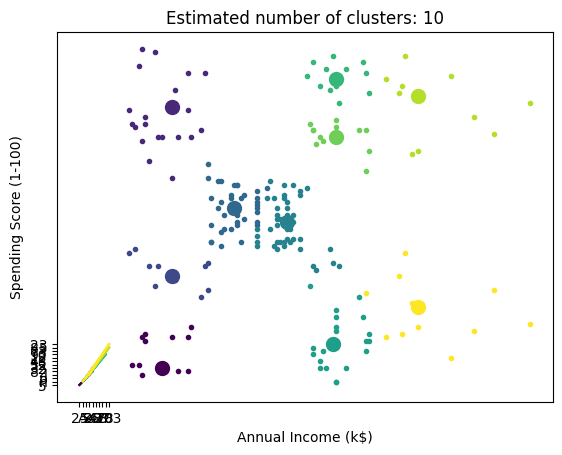

In [41]:
n_clusters_ = len(center)

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, n_clusters_)))

for k, col in zip(range(n_clusters_), colors):
    class_members = label == k
    cluster_center = x.iloc[center[k]]

    plt.scatter(
        x.iloc[class_members, 0],
        x.iloc[class_members, 1],
        color=col["color"], marker="."
    )

    plt.scatter(
        cluster_center.iloc[0], cluster_center.iloc[1],
        s=100, color=col["color"], marker="o"
    )

    for point in x[class_members]:
        plt.plot(
            [cluster_center.iloc[0], point[0]],
            [cluster_center.iloc[1], point[1]],
            color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.xlabel(x.columns[0])
plt.ylabel(x.columns[1])
plt.show()


In [42]:
supervised.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)', 'cluster_group'], dtype='str')

C:\Users\Diwali 6\anaconda3\envs\ml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


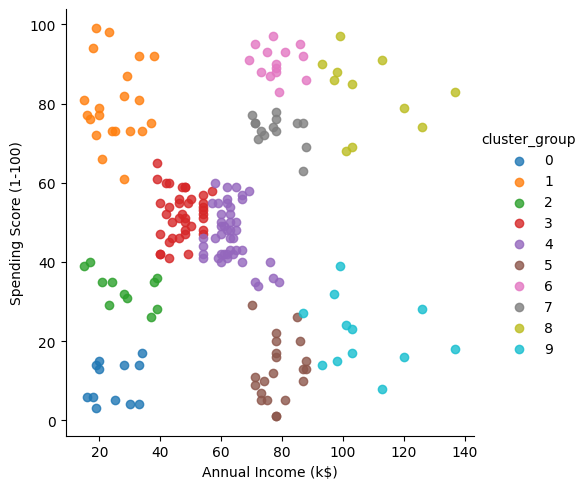

In [43]:
import seaborn as sb
sb.lmplot(data=supervised,x=supervised.columns[0],y=supervised.columns[1],hue=supervised.columns[2],fit_reg=False,legend=True,legend_out=True)